In [ ]:
!pip install qiskit-ignis
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 198 kB 5.2 MB/s 
     |████████████████████████████████| 4.8 MB 16.1 MB/s 
     |████████████████████████████████| 50 kB 3.7 MB/s 
     |████████████████████████████████| 49 kB 3.2 MB/s 
     |████████████████████████████████| 943 kB 49.3 MB/s 
     |████████████████████████████████| 37.5 MB 2.7 MB/s 
     |████████████████████████████████| 1.9 MB 31.7 MB/s 
     |████████████████████████████████| 112 kB 18.7 MB/s 


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex,plot_histogram
from qiskit.extensions import Initialize
from qiskit import Aer,transpile,assemble
from cryptography.fernet import Fernet
import base64
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
import os
from qiskit.ignis.verification import marginal_counts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  if sys.path[0] == '':


In [ ]:
def create_bell_pair(qc,a,b):
  qc.h(a)
  qc.cx(a,b)

In [ ]:
def alice_gates(qc,psi,a):
  qc.cx(psi,a)
  qc.h(psi)

In [ ]:
def measure_and_send(qc,a,b):
  qc.measure(0,a)
  qc.measure(1,b)

In [ ]:
def bob_gates(qc,qubit,cr1,cr2):
  qc.x(qubit).c_if(cr2,1)
  qc.z(qubit).c_if(cr1,1)

In [ ]:
def create_crypter(password):
  
  salt=os.urandom(16)
  kdf=PBKDF2HMAC(algorithm=hashes.SHA256,length=32,salt=salt,iterations=10,backend=default_backend())
  key=base64.urlsafe_b64encode(kdf.derive(password))
  crypter=Fernet(key)
  return crypter

In [ ]:
def statevector_to_bytes(statevector):
  inDict=statevector.to_dict().values()
  element1=str(state_list[0])
  element1=element1.encode()
  return inDict

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

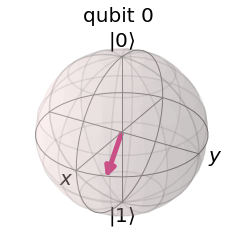

In [ ]:
psi=random_statevector(2)
psiclone=psi
# print(psi)
display(array_to_latex(psi,prefix="|\\psi\\rangle="))
display(array_to_latex(psiclone,prefix="|\\psi\\rangle="))
  
plot_bloch_multivector(psi)
# def generate_randomState_and_hash_data(data):

In [ ]:
state_in_bytes=psi.to_dict().values()
print(state_in_bytes)
# print(state_in_bytes)
state_list=list(state_in_bytes)
element1=str(state_list[0])
element1=element1.encode()
# element1=base64.urlsafe_b64encode(element1)
salt=os.urandom(16)
password=b"hello"
msg="heyo"
# encoded=base64.b64encode(element1)
kdf=PBKDF2HMAC(algorithm=hashes.SHA256,length=32,salt=salt,iterations=10,backend=default_backend())
key=base64.urlsafe_b64encode(kdf.derive(element1))
# print(key)
# print(type(key))
# key=Fernet.generate_key()
# print(key, type(key))
crypter=Fernet(key)
encrypted=crypter.encrypt(msg.encode())
print(encrypted)
decrypted=crypter.decrypt(encrypted)
print(decrypted.decode())
  

dict_values([(0.5786124596962485-0.6335990905319481j), (0.20486443946992627+0.4709462553222166j)])
b'gAAAAABjZuV9ftkDNZgkz0QJFqpDnNwe2jQts1jd397x5YeUD--m-vNRkXvAML0UOyZ42mHlqNVI7K4LpDMrZUIVaqlMms8RSg=='
heyo


In [ ]:
init_gate=Initialize(psi)
init_gate.label="init"

In [ ]:
inverse_init_gate=init_gate.gates_to_uncompute()

In [ ]:
qr=QuantumRegister(3,name="qr")
cra=ClassicalRegister(1,name="crz")
crb=ClassicalRegister(1,name="crx")
qc=QuantumCircuit(qr,cra,crb)

# 0: Initialize the statevector that we want to transfer
qc.append(init_gate,[0])
qc.barrier()

# 1: Create Bell pair
create_bell_pair(qc,1,2)
qc.barrier()

#2: Alice's Gates
alice_gates(qc,0,1)
qc.barrier()

#3: Measure the qubit and send to Bob
measure_and_send(qc,0,1)
qc.barrier()

#4: Bob's Gates
bob_gates(qc,2,cra,crb)
qc.barrier()

#5. Disentangle it
qc.append(inverse_init_gate,[2])

qc.draw()

┌────────────────────────────────────────┐ ░            ░      ┌───┐ ░ »
qr_0: ┤ init(0.57861-0.6336j,0.20486+0.47095j) ├─░────────────░───■──┤ H ├─░─»
      └────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ »
qr_1: ───────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─»
                                                 ░ └───┘┌─┴─┐ ░ └───┘      ░ »
qr_2: ───────────────────────────────────────────░──────┤ X ├─░────────────░─»
                                                 ░      └───┘ ░            ░ »
 crz: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 crx: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
«      ┌─┐    ░            ░                 
«qr_0: ┤M├────░────────────░─────────────────
«      └╥┘┌─┐ ░            ░                 
«qr_1: ─╫─┤M├─░────────────░─────────────────
«       ║ └╥┘ ░ ┌───┐┌───┐ ░ ┌──────────────┐
«qr_2: ─╫──╫──░─┤ X ├┤ Z ├─░─┤ disentangler ├
«       ║  ║  ░ └─╥─┘└─╥─┘ ░ └──────────────┘
« crz: ═╩══╬══════╬════■═════════════════════
«          ║      ║   0x1                    
« crx: ════╩══════■══════════════════════════
«                0x1

In [ ]:
sim=Aer.get_backend("aer_simulator")
qc.save_statevector()
out_vector=sim.run(qc).result().get_statevector()
print(out_vector)
display(array_to_latex(out_vector, prefix="|\\psi\\rangle="))
plot_bloch_multivector(out_vector)

ERROR:  [Experiment 0] Circuit circuit-128 contains invalid instructions {"gates": {disentangler}} for "statevector" method.


QiskitError: ignored

In [ ]:
cr_result=ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw()

┌────────────────────────────────────────┐ ░            ░      ┌───┐ ░ »
qr_0: ┤ init(0.57861-0.6336j,0.20486+0.47095j) ├─░────────────░───■──┤ H ├─░─»
      └────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ »
qr_1: ───────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─»
                                                 ░ └───┘┌─┴─┐ ░ └───┘      ░ »
qr_2: ───────────────────────────────────────────░──────┤ X ├─░────────────░─»
                                                 ░      └───┘ ░            ░ »
 crz: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 crx: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
  c1: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
«      ┌─┐    ░            ░                    
«qr_0: ┤M├────░────────────░────────────────────
«      └╥┘┌─┐ ░            ░                    
«qr_1: ─╫─┤M├─░────────────░────────────────────
«       ║ └╥┘ ░ ┌───┐┌───┐ ░ ┌──────────────┐┌─┐
«qr_2: ─╫──╫──░─┤ X ├┤ Z ├─░─┤ disentangler ├┤M├
«       ║  ║  ░ └─╥─┘└─╥─┘ ░ └──────────────┘└╥┘
« crz: ═╩══╬══════╬════■══════════════════════╬═
«          ║      ║   0x1                     ║ 
« crx: ════╩══════■═══════════════════════════╬═
«                0x1                          ║ 
«  c1: ═══════════════════════════════════════╩═
«

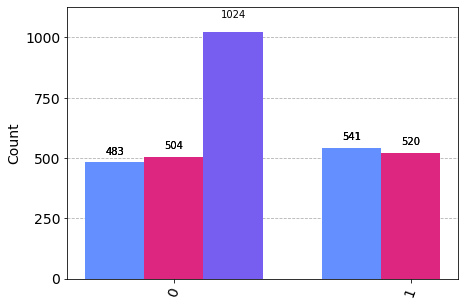

In [ ]:
sim=Aer.get_backend("aer_simulator")
t_qc=transpile(qc,sim)
t_qc.save_statevector()
counts=sim.run(t_qc).result().get_counts()
qubit_counts=[marginal_counts(counts,[qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

In [ ]:
byte_vector=statevector_to_bytes(out_vector)
# bob_crypter=create_crypter(byte_vector)

# bob_decryption=bob_crypter.decrypt(encrypted)
print(byte_vector)

dict_values([(0.30943042951356925-0.7053058785980255j), (0.29822768844271397+0.5637877905313583j)])


Cannot believe that Quantum Teleportation is showing inaccuracy and hence unable to proceed with what I originally thought because the algorithm won't adjust for the fluctutions in the transferred state